# DSCI 512 Lecture 2: Lookups


- Linear search and binary search intro
- Code timings 
- Sorting
- Hash tables, hash functions 
- T/F questions

## Linear search and binary search intro

Today we are going to focus on finding things. Let's start with the simpliest way of finding something in a list with unknown contents: just iterating through it.

In [3]:
def search_unsorted(data, key):
    """
    Searches the key in data using linear search 
    and returns True if found and False otherwise. 
    
    Arguments:
    data -- (list) the elements to search within
    key -- (int) the key to search for
    """
    # my code here
    for element in data:
        if element == key:
            return True
    return False
    # my code here


In [4]:
# Some tests

# key is the first element in the list
assert search_unsorted([4,7,9,-12,1000], 4)

# key is the last element in the list
assert search_unsorted([4,7,9,-12,1000], 1000)

# key occurs multiple times in the list
assert search_unsorted([4,7,9,-12,4,1000], 4)

# key is larger than the largest element in the list
assert not search_unsorted([4,7,9,-12,1000], 2000)

# key is smaller than the smallest element in the list
assert not search_unsorted([4,7,9,-12,1000], -18)

# nothing is in an empty list
assert not search_unsorted([], 1)
print("Success")

Success


**Question:** What is the time complexity of the `search_unsorted`, as a function of the length of the list, $n$? 

**Answer:** <span style="background-color:black;">The time complexity of the *search_unsorted* function is $O(n)$ because in the worst case the function loops over $n$ elements.</span>

Now let's doing something more clever. If we happen to know that our input is sorted, we can search in a better way

In [5]:
def search_sorted(data, key):
    """
    Searches the key in data using binary search 
    and returns True if found and False otherwise. 
    
    Arguments
    data -- (list) the elements to search within
    key -- (int) the key to search for
    """
    low = 0 
    high = len(data) - 1 
    #my code here
    while (low <= high):
        mid = (high + low)//2
        if data[mid] == key:
            return True
        if key < data[mid]:
            high = mid - 1
        else:
            low = mid + 1
    return False
    #my code here

In [6]:
data = [-12,4,7,9,45,45,987,1000,2000]

In [7]:
# Test cases for binary search

# key is the first element in the list
assert search_sorted(data, -12) == True

# key is the last element in the list
assert search_sorted(data, 2000) == True

# key occurs multiple times in the list
assert search_sorted(data, 45) == True

# key is larger than the largest element in the list
assert search_sorted(data, 3000) == False

# key is smaller than the smallest element in the list
assert search_sorted(data, -18) == False

# nothing is in an empty list
assert search_unsorted([], 1) == False
print("Success")

Success


**Question:** What is the time complexity of the `search_sorted`, as a function of the length of the list, $n$? 

**Answer:** <span style="background-color:black;"> The time complexity of the *search_sorted* function is $O(\log n)$ because in the worst case, the function loops over $\log_2 n$ elements, as the search space reduces by half in each iteration of the loop. </span>

**Question:** What happens if you call `search_unsorted` on sorted data? What happens if you call `search_sorted` on unsorted data?

**Answer:** The `search_unsorted` function does not care about whether the data is sorted or not. In both cases, it sequentially searches for the key and returns `True` when it is found. The `search_sorted` function, on the other hand, is based on the assumption that the data is sorted in ascending order and you might miss the element you are looking for if called on unsorted data. In binary search, whenever we are in a position, all elements on the left are less than (or equal to in cases where values occur multiple times in the data) the element at the position and all elements on the right are greater than the element at the position, which is helpful in deciding which part of the list the next search should happen.   

For example:

In [8]:
search_sorted([3,2,1], 1)

False

**Question:** Why doesn't the `search_sorted` function start by verifying that the list is indeed sorted?

**Answer:** <span style="background-color:black;"> because this would take $O(n)$ time, defeating the purpose of the $O(\log\, n)$ lookup. </span>

## Code timing

Below we empirically measure the running times of `search_unsorted` and `search_sorted`. 

In [18]:
import numpy as np
import pandas as pd
from collections import defaultdict

list_sizes = [100, 1000, 10000, 100000, 1000000, 10000000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1

for list_size in list_sizes:
    print('List size: ', list_size) 
    x = np.random.randint(1e8, size=list_size)
    
    time = %timeit -q -o -r 1 search_unsorted(x, key)
    results["Unsorted list linear"].append(time.average)
    # Note: -q prevents it from printing to the terminal
    #       -o sends the result to a variable (average time in seconds)
    #       -r 3 makes it average only 3 trials instead of the default of 7, which saves time

    time = %timeit -q -o -r 1 (key in x)
    results["Unsorted list in"].append(time.average)

    x.sort()
    time = %timeit -q -o -r 1 search_sorted(x, key)
    results["Sorted list binary"].append(time.average)
    
    x_set = set(x)
    time = %timeit -q -o -r 1 (key in x_set)
    results["Python set in"].append(time.average)

List size:  100
List size:  1000
List size:  10000
List size:  100000
List size:  1000000
List size:  10000000


In [19]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,size,Unsorted list linear,Unsorted list in,Sorted list binary,Python set in
0,100,0.000026,0.000003,0.000005,4.511673e-08
1,1000,0.000260,0.000004,0.000007,4.631481e-08
2,10000,0.002780,0.000010,0.000009,3.863441e-08
3,100000,0.023517,0.000068,0.000013,4.601996e-08
4,1000000,0.243826,0.000708,0.000014,5.760749e-08
5,10000000,3.357646,0.010565,0.000018,4.619898e-08


Are these consistent with the time complexities we expected?

Reading runtimes from a table: what happens of $N$ becomes $10N$?

- Linear: time $T$ goes up to $10T$
- Logarithmic: time $T$ goes up to $T+\Delta T$
- Constant: time $T$ stays about the same

In [11]:
import altair as alt

In [12]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

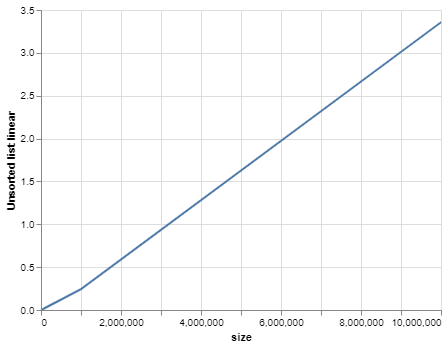

In [20]:
alt.Chart(df).mark_line().encode(
    x='size',
    y='Unsorted list linear'
)

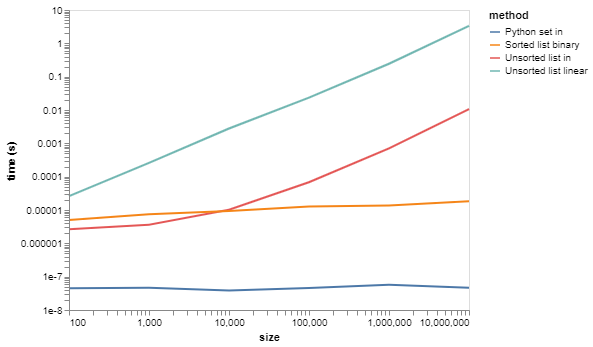

In [21]:
df_long = pd.melt(df, id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)', scale=alt.Scale(type='log')),
    color='method'
).configure_axis(grid=False)

Note that the `binary_search` we wrote is actually slower than the linear search using `in` when the list is smaller than $10,000$ elements. Remember, big-O is just an "asymptotic" trend. There could be:

- Large/small constants, like $10\log(n)$ vs. $100000\log(n)$.
- "Lower order terms", like $\log(n)+1$ vs. $\log(n)+100000$.

In this case what we are seeing is perhaps more attributable to the former; the individual steps of our binary search function are almost certainly slower than the individual steps occuring when we use `in` (Why?)

We can compare just the faster methods, to see the difference:

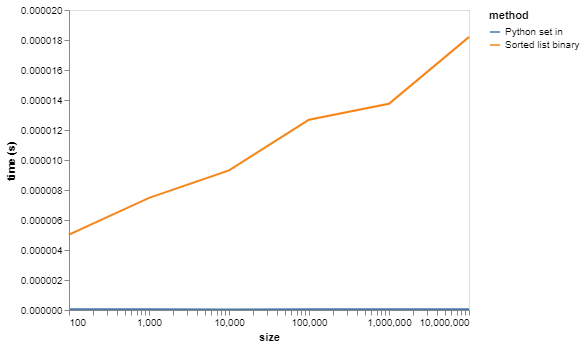

In [22]:
df_long = pd.melt(df[["size", "Sorted list binary", "Python set in"]],
                      id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)'),
    color='method'
).configure_axis(grid=False)

We can see that the hash table really is constant, but the binary search is logarithmic - in the plot, time is linear in $\log(N)$.

## Sorting

- Sorting is a very popular topic in Algorithms and Data Structures courses
- We'll start with insertion sort.

In [3]:
def insertion_sort(x):
    """Sorts x inplace using insertion sort."""
    
    n = len(x)
    
    for i in range(n):
        # Get the index of the smallest value from location i onward
        # my code here
        min_ind = i
        for j in range(i+1, n):
            if x[j] < x[min_ind]:
                min_ind = j
        x[i], x[min_ind] = x[min_ind], x[i] 
        # my code here
        print(x)

In [6]:
x = [7, 9,1000,4,-12]
insertion_sort(x)
x

[-12, 9, 1000, 4, 7]
[-12, 4, 1000, 9, 7]
[-12, 4, 7, 9, 1000]
[-12, 4, 7, 9, 1000]
[-12, 4, 7, 9, 1000]


[-12, 4, 7, 9, 1000]

**Question:** What is the time complexity of this method?

**Answer:** $O(n^2)$, since there are 2 nested loops over the input. The actual number of steps is more like $n^2/2$.

- Can we do better than $O(n^2)$? 

**Question:** could we find a sorting algorithm that takes $\log(n)$ time?

**Answer:** no way, because it takes $n$ steps to even inspect every element of the input!

- The real answer is that the best sorting algorithms are $n \log(n)$ time. This is close enough to $O(n)$ that we should be very happy with the result. 
- We will look at  $n \log(n)$ time algorithm [mergesort](https://www.geeksforgeeks.org/merge-sort/) in the next lecture. The built-in Python sort function uses an algorithm called [timsort](https://www.geeksforgeeks.org/timsort/), which is also $n \log(n)$ and has the nice property that it is very fast for sorted or partially sorted lists

## Hash tables, hash functions


- Python's `set` type needs to support the following operations:
  - inserting a new element
  - deleting an element
  - checking if an element is present

How could we implement this using the tools we already have?

- Well, what about using linear search to find elements, e.g. a `list`?
  - This is too slow
- What about using binary search?
  - Now searching is fast, but insertion/deletion is slow, because we need to maintain an ordered list
- Enter the [hash table](https://en.wikipedia.org/wiki/Hash_table) - to save the day!
  - Trees could also work (see Lecture 4), but hash tables are the most popular.
  
#### Hash functions

Python objects have a _hash_:

In [16]:
hash("mds-cl")

-5816527186066543490

In [17]:
hash("")

0

Above: it looks like the hash function returns an integer.

In [61]:
hash(5.5)

1152921504606846981

In [58]:
hash(5)

5

In [71]:
hash(-9999)

-9999

Above: it looks like the hash function of a Python integer is itself. Or at least small enough integers.

In [73]:
hash(999999999999999999999999)

2003764205207330319

Sometimes it fails?

In [62]:
hash([1,2,3])

TypeError: unhashable type: 'list'

In [63]:
hash((1,2,3))

2528502973977326415

In [64]:
hash(None)

-9223372036571420425

If a Python `set` is a hash table (it is!), that means items in it must be hashable:

In [65]:
s = set()

In [66]:
s.add(5.5)

In [67]:
s.add("mds")

In [68]:
s.add([1,2,3])

TypeError: unhashable type: 'list'

In [69]:
s.add((1,2,3))

In [70]:
s

{(1, 2, 3), 5.5, 'mds'}

Note also that order is not preserved in the set. 

In general, mutable objects are not hashable.

#### Hash tables

- So, it looks like the hash function maps from an object to an integer.
- And that Python `set` and `dict` use these hash functions.
- How do they work?
- The hash table is basically a big array (list), and the hash function (mod the array size) maps an object to its location in the array.
  - But it's a bit more complicated than that.
  - The array typically expands and contracts automatically as needed.
  - These operations may be slow, but averaged or "amortized" over many operations, the runtime is $O(1)$
  - The hash function depends on this array size.
  - There's also an issue of collisions: when two different objects hash to the same place.
- Roughly speaking, we can insert, retrieve, and delete things in $O(1)$ time so long as we have a "good" hash function.
  - The hash function will be "good" for default Python objects.

To get a better sense of how this works, let's build a very simple hash table with just four buckets (locations). First, we create a list with four **None** objects.

In [1]:
hash_table = [None]*4

We put something in the hash table by using its hash function followed by the mod (%) operator to get a number in the correct range, which we then use as an index.

In [2]:
item = "hello"
index = hash(item) % 4
print(index)
hash_table[index] = item
print(hash_table)

0
['hello', None, None, None]


We can use the same method to check to see if something is in the hash table

In [3]:
test_item = "hello"
index = hash(test_item) % 4
print(index)
assert hash_table[index] == test_item
print("Success!")

0
Success!


Now let's add more stuff

In [3]:
items = ["my", "dear", "world","goodbye"]
for item in items:
    print(item)
    index = hash(item) % 4
    print(index)
    hash_table[index] = item
print(hash_table)

my
3
dear
0
world
3
goodbye
1
['dear', 'goodbye', None, 'world']


If we put more than four items in the hash table, we are guaranteed to have collision (as it happens, there is a randomness to the hash function, so your collisions will likely be different from mine!). To solve this, we would need some mechanism to have more than one object in each bucket. We might also consider inserting (key,value) tuples to create a dictionary, like Python `dict`.

Note that a real hash table will have a number of buckets in the order of the number of objects being stored. Although there will be some collisions, the average lookup is still $O(1)$

## T/F questions

1. Searching for a key in a `dict` takes $O(1)$ time, but searching for a value takes $O(n)$.
2. The elements of a `set` are maintained in sorted order for fast searching.
3. The best sorting algorithms run in $O(n)$ time.
4. If you hash two different Python objects, you will always get two different hashes.
5. If I have to search inside a list $1000$ times, it is better to first sort the list and then use binary search, rather than just using linear search.
6. A hash table with a fixed number of locations/buckets is $O(1)$ lookup regardless of the number of items it holds